In [13]:
pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to c:\users\admin\appdata\local\temp\pip-req-build-auh5_8ux
Note: you may need to restart the kernel to use updated packages.


  ERROR: Error [WinError 2] The system cannot find the file specified while executing command git version
ERROR: Cannot find command 'git' - do you have 'git' installed and in your PATH?


In [2]:
import os
import pathlib
import itertools
import splitfolders
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_docs as tfdocs
import tensorflow_docs.plots

from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
import os
import random as rn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.utils import plot_model
from IPython.display import Image
import pathlib
import itertools
import splitfolders

import tensorflow_docs as tfdocs
import tensorflow_docs.plots

from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report

In [7]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [8]:
dataa = 'C:\\Users\\Admin\\Downloads\\Rice_Image_Dataset'
dataa = pathlib.Path(dataa)

In [9]:
print(f'tensorflow version : {tf.__version__}')

tensorflow version : 2.16.1


In [10]:
root_dir = 'C:\\Users\\Admin\\Downloads\\Rice_Image_Dataset'
f_names = [f_name for f_name in os.listdir(root_dir)]
print(f"Folder names:\n{f_names}")

Folder names:
['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']


In [11]:
rice_classes = f_names.copy()
print(f"Rice classes:\n{', '.join(rice_classes)}")

Rice classes:
Arborio, Basmati, Ipsala, Jasmine, Karacadag


In [12]:
splitfolders.ratio(input=dataa, output='rice_imgs', seed=42, ratio=(0.7, 0.15, 0.15))
BATCH_SIZE = 16
IMAGE_SIZE = (150, 150)

Train = keras.utils.image_dataset_from_directory(
    directory='/rice_imgs/train',
    labels='inferred',
    label_mode='int',
    batch_size = BATCH_SIZE,
    image_size = IMAGE_SIZE,
    seed=42,
)

Validation = keras.utils.image_dataset_from_directory(
    directory='/rice_imgs/val',
    labels='inferred',
    label_mode='int',
    batch_size = BATCH_SIZE,
    image_size = IMAGE_SIZE,
    seed=42,
)

Test = keras.utils.image_dataset_from_directory(
    directory='/rice_imgs/test',
    labels='inferred',
    label_mode='int',
    batch_size = BATCH_SIZE,
    image_size = IMAGE_SIZE,
    seed=42,
)

Copying files: 0 files [00:00, ? files/s]

Copying files: 75000 files [02:00, 623.05 files/s] 


In [13]:
rice_list = []

for rice_class in rice_classes:
    class_dir = os.path.join(root_dir, rice_class)
    for img_path in os.listdir(class_dir):
        full_path = os.path.join(class_dir, img_path)
        rice_list.append((full_path, rice_class))

In [14]:
df = pd.DataFrame(rice_list, columns=["File_Path", "Label"])

In [15]:
df.head(10)

,File_Path,Label
0,C:\Users\Admin\Downloads\Rice_Image_Dataset\Ar...,Arborio
1,C:\Users\Admin\Downloads\Rice_Image_Dataset\Ar...,Arborio
2,C:\Users\Admin\Downloads\Rice_Image_Dataset\Ar...,Arborio
3,C:\Users\Admin\Downloads\Rice_Image_Dataset\Ar...,Arborio
4,C:\Users\Admin\Downloads\Rice_Image_Dataset\Ar...,Arborio
5,C:\Users\Admin\Downloads\Rice_Image_Dataset\Ar...,Arborio
6,C:\Users\Admin\Downloads\Rice_Image_Dataset\Ar...,Arborio
7,C:\Users\Admin\Downloads\Rice_Image_Dataset\Ar...,Arborio
8,C:\Users\Admin\Downloads\Rice_Image_Dataset\Ar...,Arborio
9,C:\Users\Admin\Downloads\Rice_Image_Dataset\Ar...,Arborio


In [16]:
df = df.sample(frac=1).reset_index(drop=True)
df.head(10)

,File_Path,Label
0,C:\Users\Admin\Downloads\Rice_Image_Dataset\Ja...,Jasmine
1,C:\Users\Admin\Downloads\Rice_Image_Dataset\Ka...,Karacadag
2,C:\Users\Admin\Downloads\Rice_Image_Dataset\Ja...,Jasmine
3,C:\Users\Admin\Downloads\Rice_Image_Dataset\Ba...,Basmati
4,C:\Users\Admin\Downloads\Rice_Image_Dataset\Ar...,Arborio
5,C:\Users\Admin\Downloads\Rice_Image_Dataset\Ja...,Jasmine
6,C:\Users\Admin\Downloads\Rice_Image_Dataset\Ar...,Arborio
7,C:\Users\Admin\Downloads\Rice_Image_Dataset\Ip...,Ipsala
8,C:\Users\Admin\Downloads\Rice_Image_Dataset\Ip...,Ipsala
9,C:\Users\Admin\Downloads\Rice_Image_Dataset\Ip...,Ipsala


In [17]:
total_samples = df.shape[0]
print(f"Total number of samples is {total_samples}")

Total number of samples is 75000


In [18]:
0.15 * total_samples, 0.7 * total_samples

(11250.0, 52500.0)

In [19]:
train_set = df[:52500].copy() 
validate_set = df[52500:63750].copy() 
test_set = df[63750:].copy()

In [23]:
for image_batch, labels_batch in train_generator:
    print(f"Train Shape: {image_batch.shape} (Batches = {len(train_generator)})")
    print(f"Train label: {labels_batch.shape}\n")
    break
    
for image_batch, labels_batch in validation_generator:
    print(f"Validation Shape: {image_batch.shape} (Batches = {len(validation_generator)})")
    print(f"Validation label: {labels_batch.shape}\n")
    break
    
for image_batch, labels_batch in test_generator:
    print(f"Test Shape: {image_batch.shape} (Batches = {len(test_generator)})")
    print(f"Test label: {labels_batch.shape}\n")
    break

Train Shape: (32, 224, 224, 3) (Batches = 1641)
Train label: (32, 5)

Validation Shape: (32, 224, 224, 3) (Batches = 352)
Validation label: (32, 5)

Test Shape: (32, 224, 224, 3) (Batches = 352)
Test label: (32, 5)



In [25]:
classes_counts = {rice_class: len(os.listdir(os.path.join(root_dir, rice_class))) for rice_class in rice_classes}

In [26]:
sizes = list(classes_counts.values())
labels = list(classes_counts.keys())

fig = go.Figure(data=[go.Pie(labels=labels,
                             values=sizes,
                             hole=0.3,
                             marker_colors=px.colors.sequential.Greens,
                             textinfo='label+percent',
                             insidetextorientation='radial')])

fig.update_layout(title='Rice Classes')
fig.show()

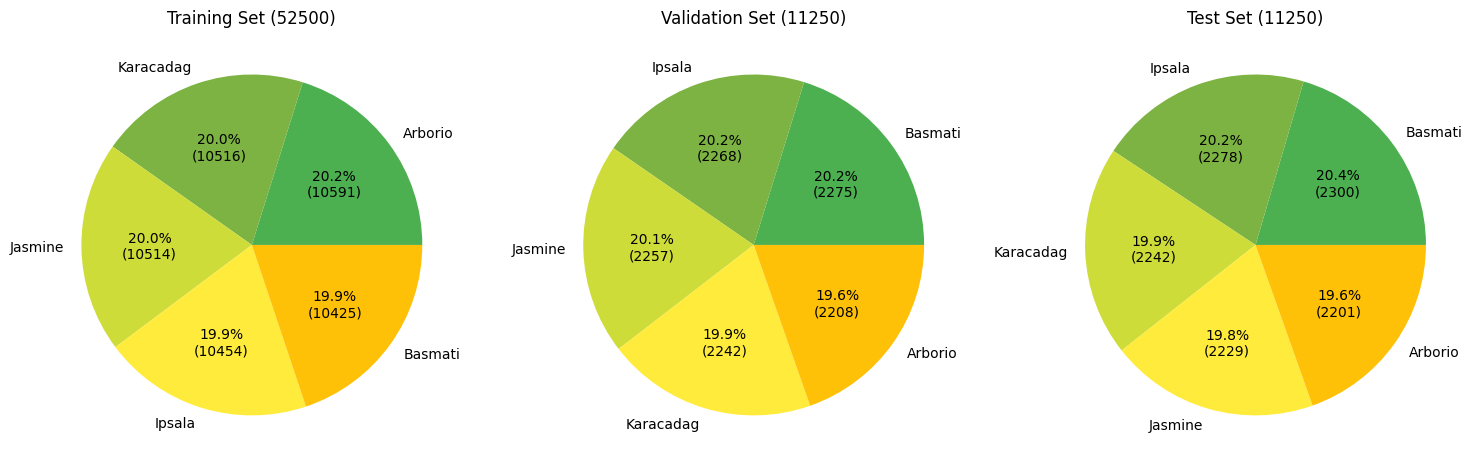

In [20]:
def train_calidate_test_plot():
    colors = ['#4CAF50', '#7CB342', '#CDDC39', '#FFEB3B', '#FFC107', '#FF9800', '#FF5722', '#F44336', '#E91E63', '#9C27B0']

    category_counts = df['Label'].value_counts()
    categories = category_counts.index.tolist()
    counts = category_counts.values.tolist()

    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    for i, (subset, subset_name) in enumerate(zip([train_set, validate_set, test_set], ['Training Set', 'Validation Set', 'Test Set'])):
        subset_category_counts = subset['Label'].value_counts()
        subset_counts = subset_category_counts.values.tolist()

        total_count = len(subset)
        percentages = [count / total_count * 100 for count in subset_counts]

        wedges, _, autotexts = axs[i].pie(subset_counts, labels=subset_category_counts.index, autopct=lambda p: f'{p:.1f}%\n({total_count * p / 100:.0f})', colors=colors, textprops={'color': 'black', 'fontsize': 10})
        axs[i].set_title(f'{subset_name} ({total_count})')

        for autotext in autotexts:
            autotext.set_horizontalalignment('center')
            autotext.set_verticalalignment('center')

    plt.tight_layout()
    plt.show()
train_calidate_test_plot()

In [21]:
epochs = 10
batch_size = 32
img_height = 224
img_width = 224

In [22]:
data_generator = ImageDataGenerator(rescale=1./255)

train_generator = data_generator.flow_from_dataframe(
  dataframe=train_set,
  x_col="File_Path",
  y_col="Label",
  target_size=(img_height, img_width),
  batch_size=batch_size,
  class_mode="categorical",
  shuffle=True,
  seed=42
)

validation_generator = data_generator.flow_from_dataframe(
  dataframe=validate_set,
  x_col="File_Path",
  y_col="Label",
  target_size=(img_height, img_width),
  batch_size=batch_size,
  class_mode="categorical",
  shuffle=False,
  seed=42
)

test_generator = data_generator.flow_from_dataframe(
  dataframe=test_set,
  x_col="File_Path",
  y_col="Label",
  target_size=(img_height, img_width),
  batch_size=batch_size,
  class_mode="categorical",
  shuffle=False,
  seed=42
)

Found 52500 validated image filenames belonging to 5 classes.
Found 11250 validated image filenames belonging to 5 classes.
Found 11250 validated image filenames belonging to 5 classes.


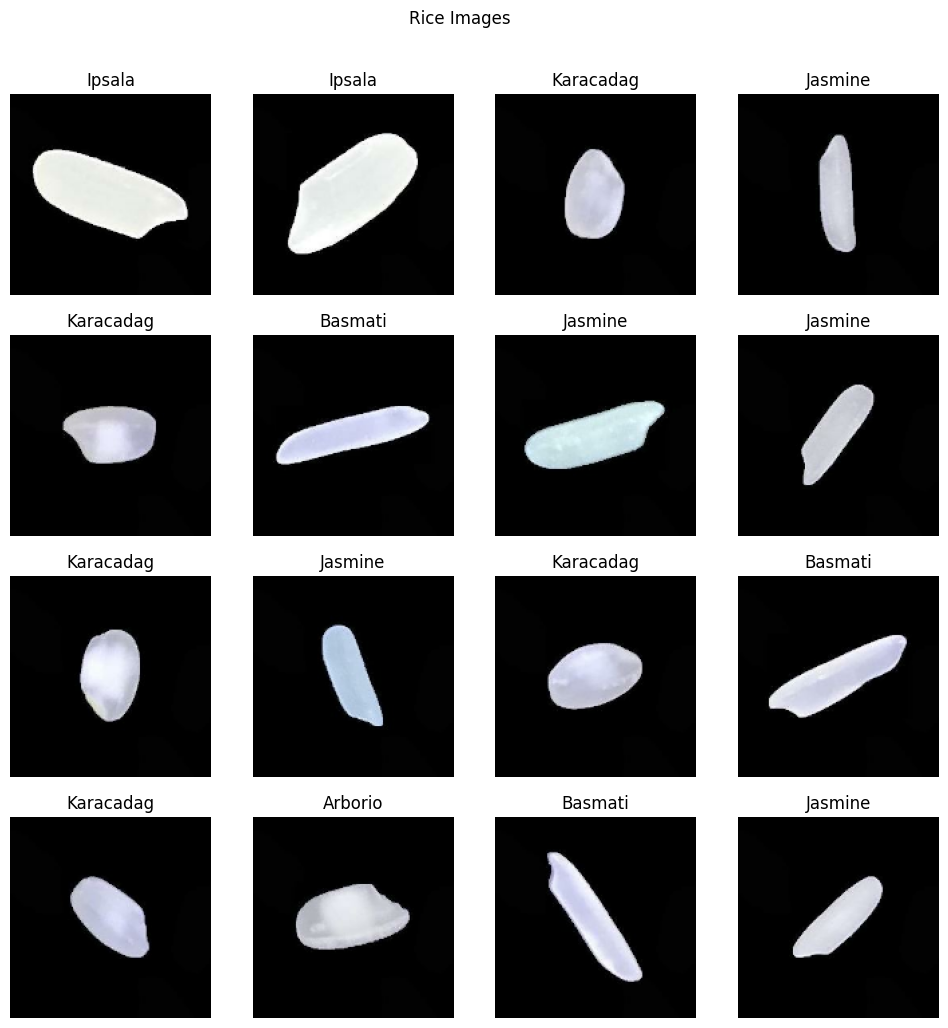

In [40]:
# visualize the data to verify is in the correct format
plt.figure(figsize=(12, 12))
for images, labels in Train.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(rice_classes[labels[i]])
    plt.axis("off")
    plt.suptitle('Rice Images', y=0.95)
plt.show()

In [45]:
CNN_model = models.Sequential([
    layers.Input(shape=(224, 224, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax')  
])

In [35]:
CNN_model.compile(loss=BinaryCrossentropy(),
                  optimizer=Adam(learning_rate=0.001),
                  metrics=['accuracy'])

In [95]:
CNN = CNN_model.fit(train_generator,
                    epochs=epochs,
                    validation_data=validation_generator)

Epoch 1/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9402 - loss: 0.0923

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



1641/1641 ━━━━━━━━━━━━━━━━━━━━ 3470s 2s/step - accuracy: 0.9402 - loss: 0.0923 - val_accuracy: 0.9612 - val_loss: 0.0444
Epoch 2/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 2853s 2s/step - accuracy: 0.9897 - loss: 0.0131 - val_accuracy: 0.9762 - val_loss: 0.0293
Epoch 3/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 2829s 2s/step - accuracy: 0.9939 - loss: 0.0083 - val_accuracy: 0.9920 - val_loss: 0.0112
Epoch 4/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 2838s 2s/step - accuracy: 0.9960 - loss: 0.0052 - val_accuracy: 0.9596 - val_loss: 0.0704
Epoch 5/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 2882s 2s/step - accuracy: 0.9945 - loss: 0.0077 - val_accuracy: 0.9940 - val_loss: 0.0086
Epoch 6/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 7806s 5s/step - accuracy: 0.9977 - loss: 0.0037 - val_accuracy: 0.9954 - val_loss: 0.0070
Epoch 7/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 3039s 2s/step - accuracy: 0.9960 - loss: 0.0055 - val_accuracy: 0.9967 - val_loss: 0.0070
Epoch 8/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 2762s 2s/step - accuracy: 0.9974 - loss: 0.00

In [99]:
CNN_model.save('CNN.h5')
history_CNN= CNN_model.history

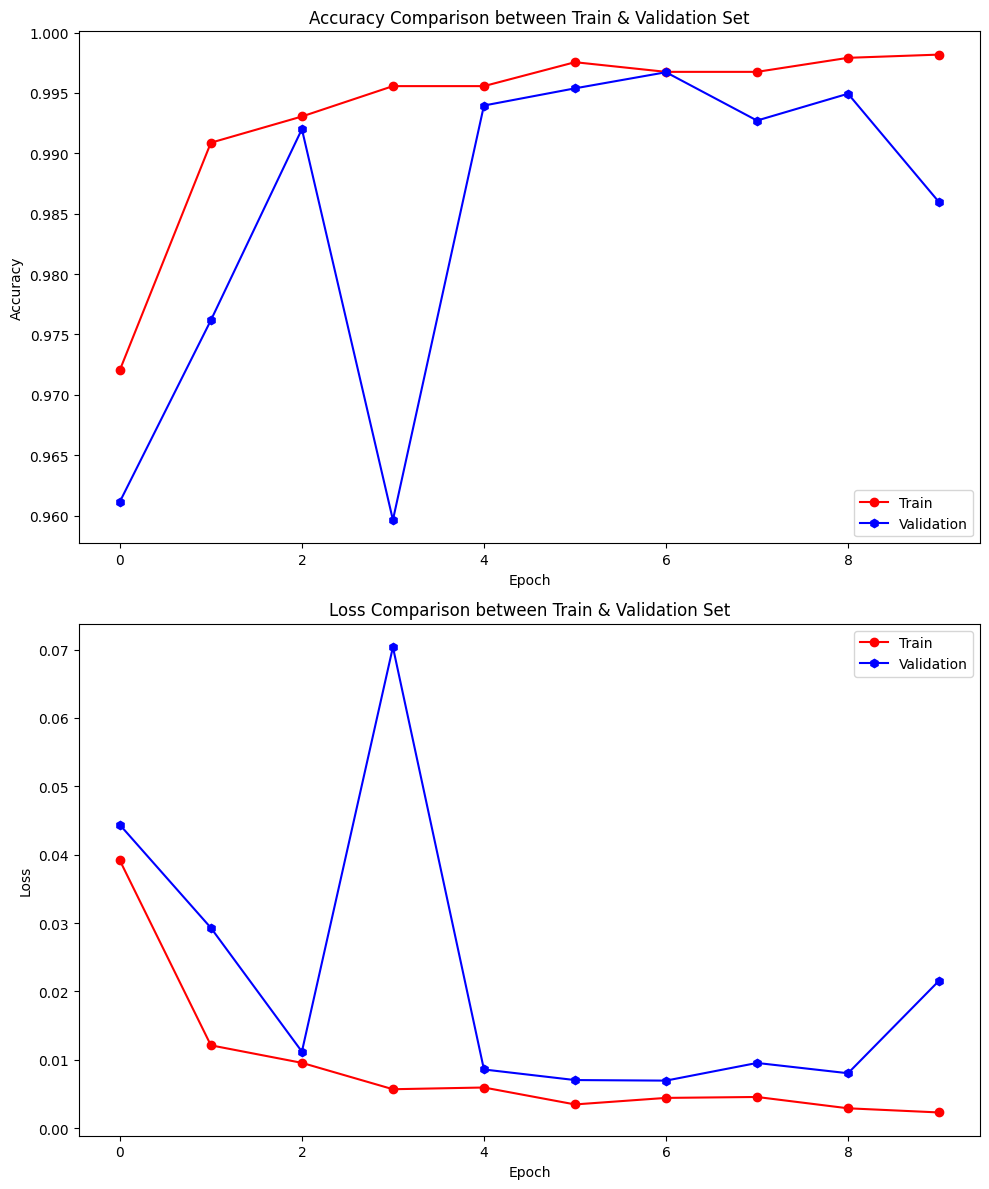

In [96]:
plot_comparision_result(CNN)

In [5]:
load_CNN = tf.keras.models.load_model('CNN.h5')

In [31]:
#AlexNet_model = models.Sequential([
#    layers.Conv2D(96, 11, strides=4, activation='relu', input_shape=(224, 224, 3)),
#    layers.BatchNormalization(),
#    layers.MaxPooling2D(pool_size=3, strides=2),
#    layers.Conv2D(256, 5, activation='relu'),
#    layers.BatchNormalization(),
#    layers.MaxPooling2D(pool_size=3, strides=2),
#    layers.Conv2D(384, 3, activation='relu'),
#    layers.Conv2D(384, 3, activation='relu'),
#    layers.Conv2D(256, 3, activation='relu'),
#    layers.MaxPooling2D(pool_size=3, strides=2),
#    layers.Flatten(),
#    layers.Dense(4096, activation='relu'),
#    layers.Dropout(0.5),
 #   layers.Dense(4096, activation='relu'),
  #  layers.Dropout(0.5),
   # layers.Dense(5, activation='softmax')])
#AlexNet_model.compile(loss=BinaryCrossentropy(),
#                  optimizer=Adam(learning_rate=0.001),
 #                 metrics=['accuracy'])
#AlexNet = AlexNet_model.fit(train_generator,
 #                   epochs=epochs,
  #                  validation_data=validation_generator)

In [27]:
def plot_confusion_matrix(conf_matrix, class_labels, model_name):
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix of {model_name}')
    plt.show()

def print_classification_report(true_classes, predicted_classes, class_labels, model_name):
    print(f"Classification Report for {model_name} Model:\n")
    print(classification_report(true_classes, predicted_classes, target_names=class_labels))

def evaluate_model(load_model, test_generator, class_labels, model_name):
    predictions = load_model.predict(test_generator)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes
    conf_matrix = confusion_matrix(true_classes, predicted_classes)
    
    return conf_matrix, true_classes, predicted_classes

conf_matrix_CNN, true_classes_CNN, predicted_classes_CNN = evaluate_model(load_CNN, test_generator, rice_classes, "CNN")

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



352/352 ━━━━━━━━━━━━━━━━━━━━ 118s 330ms/step


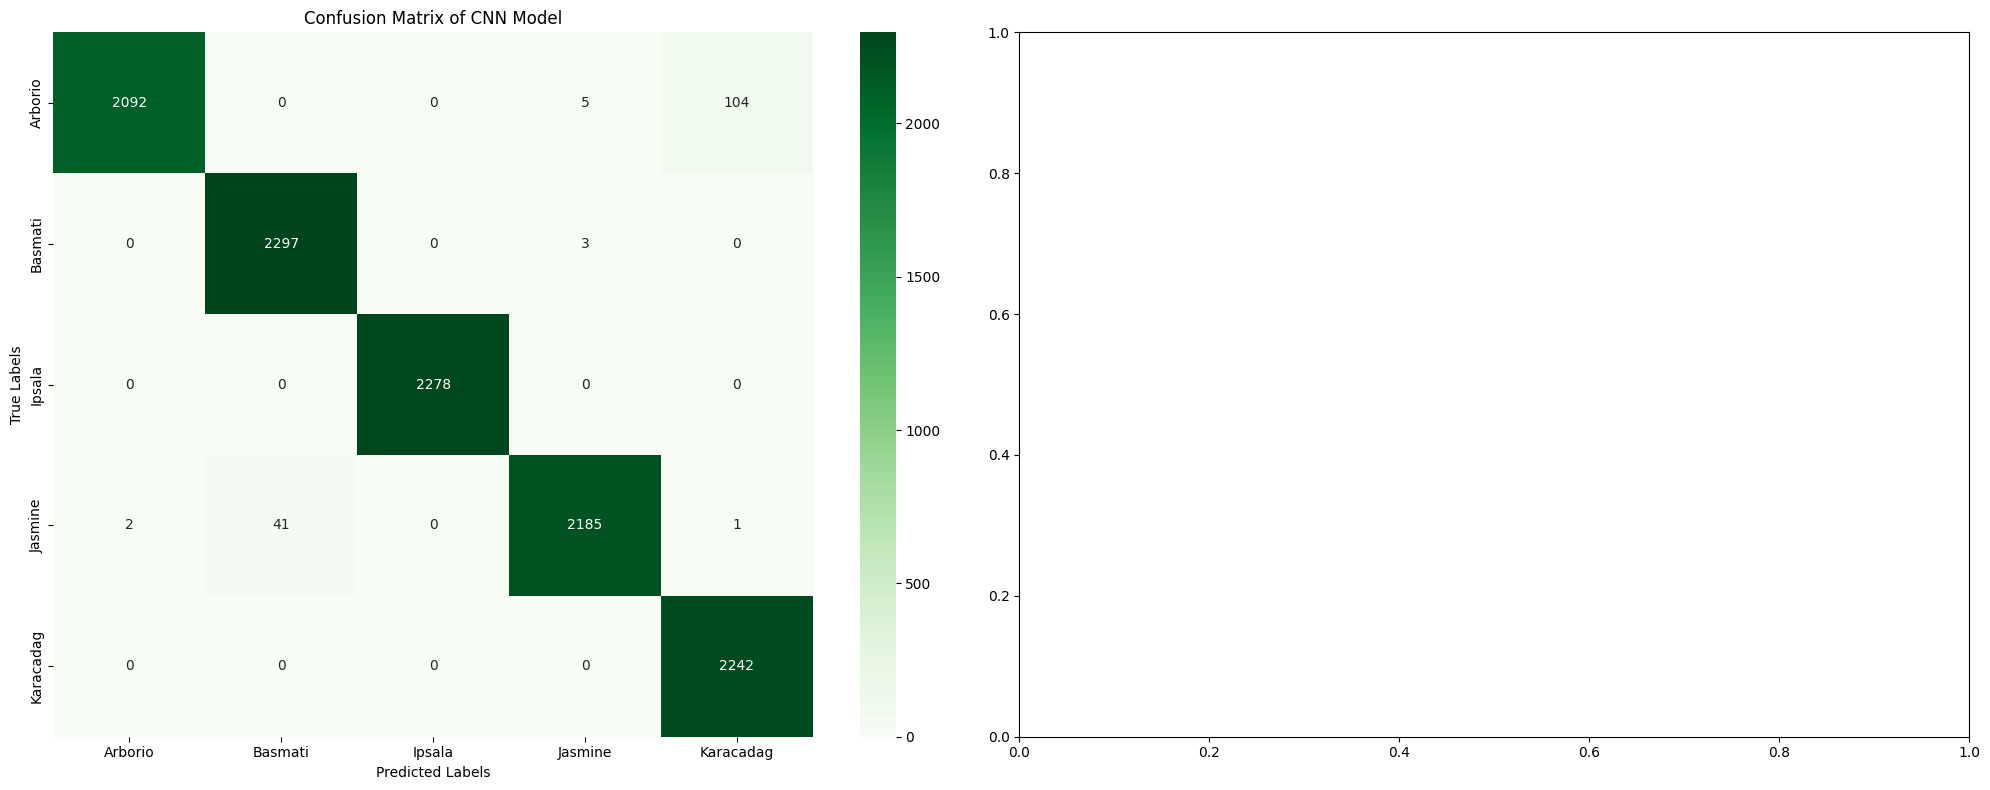

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

sns.heatmap(conf_matrix_CNN, annot=True, fmt='d', cmap='Greens', xticklabels=rice_classes, yticklabels=rice_classes, ax=axs[0])
axs[0].set_xlabel('Predicted Labels')
axs[0].set_ylabel('True Labels')
axs[0].set_title('Confusion Matrix of CNN Model')

#sns.heatmap(conf_matrix_AlexNet, annot=True, fmt='d', cmap='Greens', xticklabels=rice_classes, yticklabels=rice_classes, ax=axs[1])

#axs[1].set_xlabel('Predicted Labels')
#axs[1].set_ylabel('True Labels')
#axs[1].set_title('Confusion Matrix of AlexNet Model')

plt.tight_layout()
plt.show()

In [32]:
print_classification_report(true_classes_CNN, predicted_classes_CNN, rice_classes, "CNN")
print(53*"*")
#print_classification_report(true_classes_AlexNet, predicted_classes_AlexNet, rice_classes, "AlexNet")

Classification Report for CNN Model:

              precision    recall  f1-score   support

     Arborio       1.00      0.95      0.97      2201
     Basmati       0.98      1.00      0.99      2300
      Ipsala       1.00      1.00      1.00      2278
     Jasmine       1.00      0.98      0.99      2229
   Karacadag       0.96      1.00      0.98      2242

    accuracy                           0.99     11250
   macro avg       0.99      0.99      0.99     11250
weighted avg       0.99      0.99      0.99     11250

*****************************************************


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


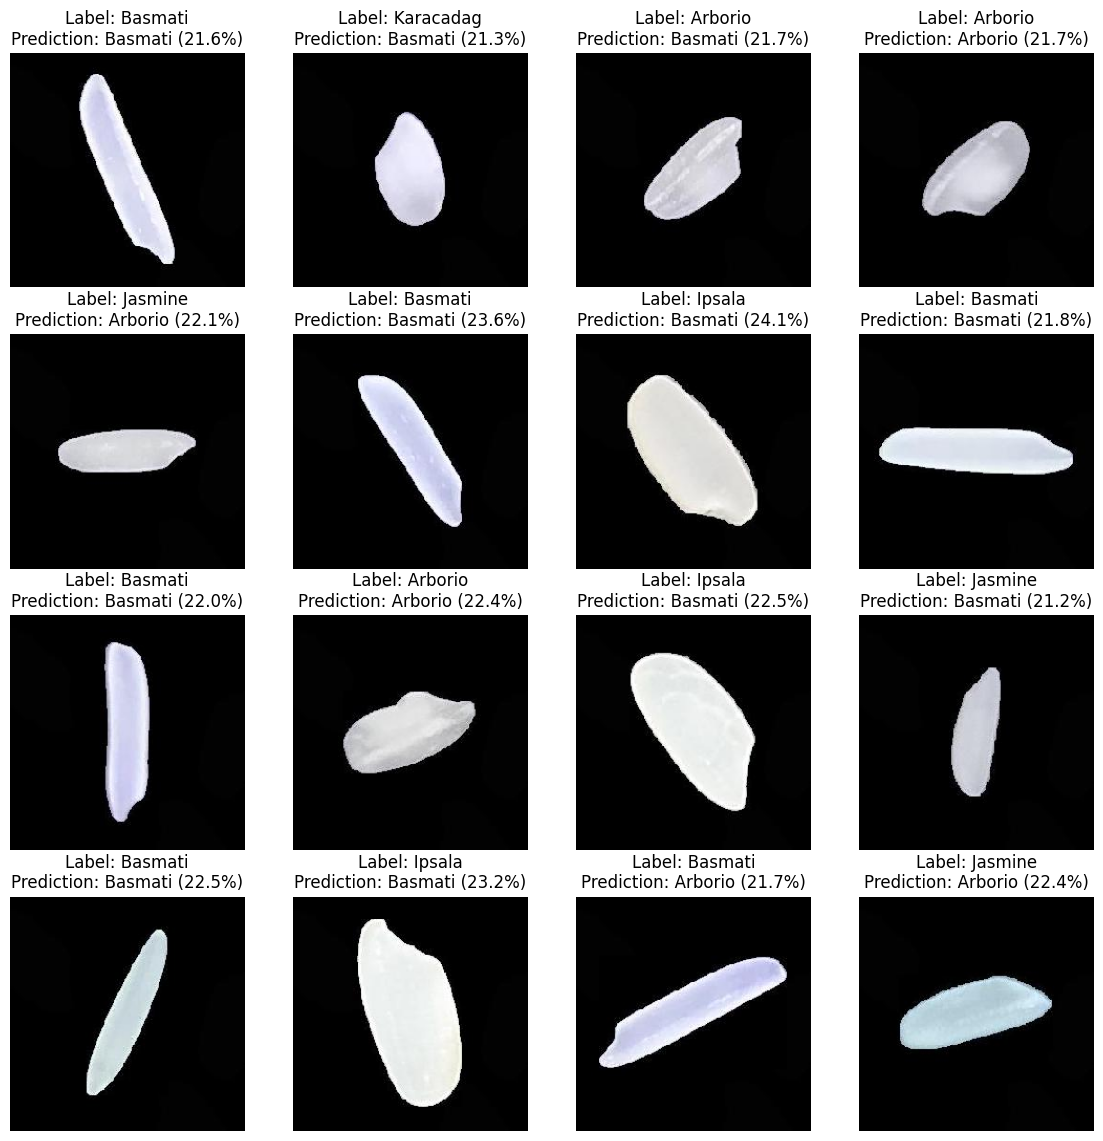

In [43]:
train_generator.reset()

images, labels = next(train_generator)

predictions = CNN_model.predict(images)
predicted_classes = np.argmax(predictions, axis=1)

plt.figure(figsize=[14, 14])
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(images[i])
    plt.axis('off')
    plt.title("Label: {}\nPrediction: {} ({:.1f}%)".format(
        rice_classes[np.argmax(labels[i])], 
        rice_classes[predicted_classes[i]], 
        100 * np.max(predictions[i])
    ))
    
plt.show() 